# DANA 4830 team project

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.image import imread


from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score, GridSearchCV
from sklearn import metrics

from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.neighbors import NeighborhoodComponentsAnalysis

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

import os
import scipy.io

In [2]:
# fig configurations
plt.rcParams["figure.figsize"] = [10,4]
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=13)
plt.rc('ytick', labelsize=13)
plt.rcParams.update({'legend.fontsize': 11})
plt.rcParams.update({'axes.labelsize': 15})
plt.rcParams.update({'font.size': 15})

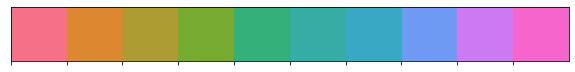

In [3]:
cpalette = sns.color_palette('husl', 10)
sns.palplot(cpalette)

In [4]:
# savefig
def savePNG(f):
    fName = f+".png"
    fPath = os.path.join("figures",fName)
    plt.savefig(fPath, dpi=300)
    
# save df as csv
def saveCSV(f,fName):
    fName2 = fName+".csv"
    fPath = os.path.join("data",fName2)
    f.to_csv(fPath)

## load datasets

## Engineering & Technical Family only
By looking at the [questionaire](https://data.gov.au/data/dataset/cc6c9728-f872-4be0-ac96-ad85b842be9f/resource/851ab942-9158-404c-9640-87c370279a8e/download/2014-aps-employee-census-questionnaire.pdf) we can filter the individuals with Engineering in the APSC in **q16@**

In [26]:
from urllib.request import urlopen
import json

In [27]:
path

'../summer21/DANA4830/Proj'

In [28]:
try:
    df = pd.read_csv(os.path.join(path, "queried-2014.csv"))
except:
    url = "https://data.gov.au/data/api/3/action/datastore_search?resource_id=9b44e035-3bed-40dc-9687-34fc47b9f228&limit=99392"
    fileobj = urlopen(url)
    byt = fileobj.read()
    
    myData = json.loads(byt.decode())
    df = pd.json_normalize(myData["result"], record_path=["records"])

In [29]:
dat14 = df[df["q16"] == "Engineering and technical; Trades and Labour"]
dat14.shape

(1596, 238)

In [30]:
## compute empty cells cols
emp2_aux = [sum(dat14[kk] == " ")/dat14.shape[0] for kk in dat14.keys()]
emp2 = pd.Series(emp2_aux, index=dat14.keys())

## empty cells rows
emp2_aux_row = [sum(dat14.loc[ix] == " ")/dat14.shape[1] for ix in dat14.index]
emp2_row = pd.Series(emp2_aux_row)

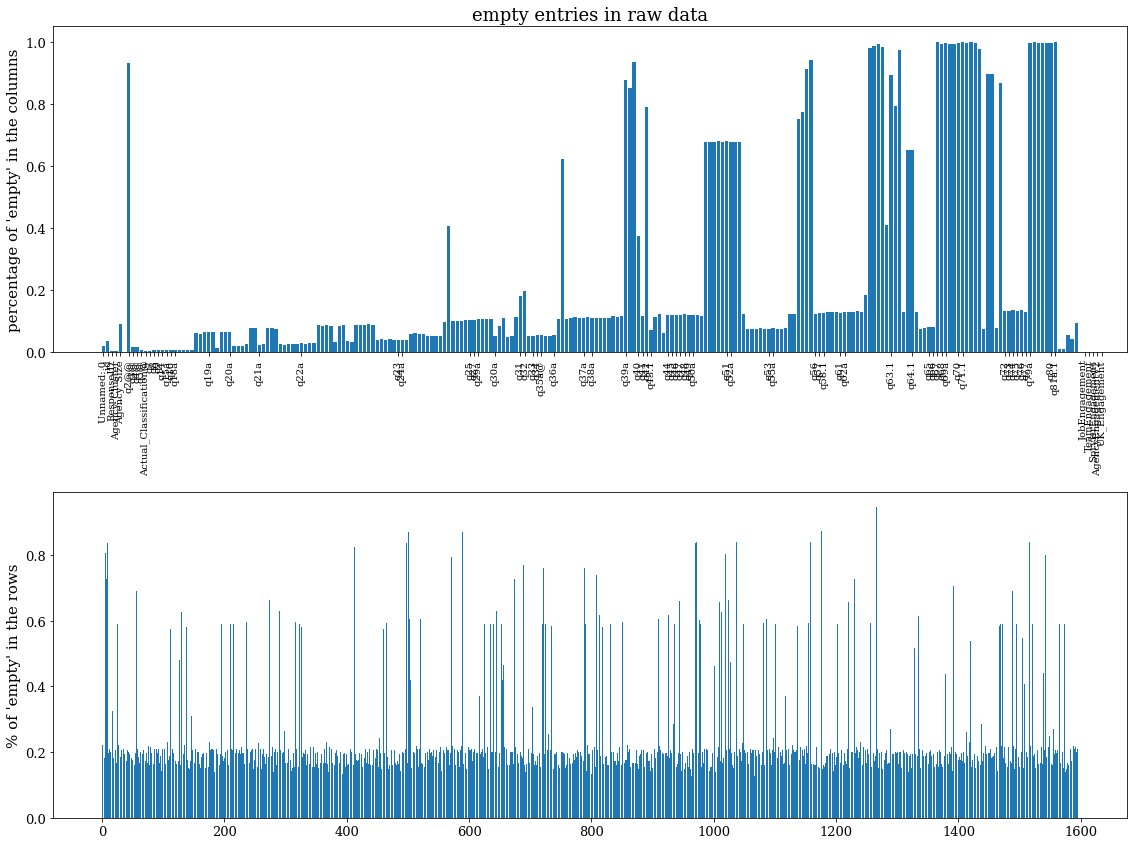

In [31]:
#git@github.com:Igodlab/Australian-Public-Service-APS.git

tick = [dat14.keys()[0], dat14.keys()[1], dat14.keys()[2], dat14.keys()[3], dat14.keys()[4]]
tick_ix = [0, 1, 2, 3, 4]

for j in range(5, dat14.shape[1]-1):
    if dat14.keys()[j][:3] != dat14.keys()[j+1][:3]:
        tick.append(dat14.keys()[j+1])
        tick_ix.append(j+1)
        
        
plt.figure(figsize=(16,12))
## print nas
naPercentage = emp2
naPercentage = naPercentage[naPercentage > 0]
plt.subplot(2,1,1)
plt.plot(figsize=(15,4))
plt.bar(naPercentage.index, naPercentage.values)
plt.xticks(tick_ix, tick, rotation='vertical', size=10)
plt.ylabel("percentage of 'empty' in the columns")
plt.title("empty entries in raw data")

## percentage of NA in the rows
naPercentage2 = emp2_row
naPercentage2 = naPercentage2[naPercentage2 > 0]
plt.subplot(2,1,2)
plt.plot(figsize=(15,4))
plt.bar(naPercentage2.index, naPercentage2.values)
plt.ylabel("% of 'empty' in the rows")

plt.tight_layout()
#savePNG("emptyEntries")

In [35]:
## male female percentages
dat14["q1"].value_counts()/dat14.shape[0]


## 

Male      0.830827
Female    0.149749
          0.019424
Name: q1, dtype: float64

# 2020 data

In [5]:
pwd

'/home/igodlab/Documents/L/Australian-Public-Service-APS'

In [6]:
ls -l ./data

total 486604
-rw-rw-r-- 1 igodlab igodlab 229784153 Jun 25 09:22 2014-aps-employee-census-5-point-dataset.csv
-rw-rw-r-- 1 igodlab igodlab 164692755 May 31 10:22 2020-aps-employee-census-dataset.csv
-rw-rw-r-- 1 igodlab igodlab  92765814 Jul 10 13:55 d20Master.csv
-rw-rw-r-- 1 igodlab igodlab       112 Jul  4 15:44 README.md
-rw-rw-r-- 1 igodlab igodlab  11021763 Jul 14 15:53 X1.csv


In [7]:
d20 = pd.read_csv(os.path.join("data", "d20Master.csv"), index_col=0)

In [8]:
d20.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108085 entries, 0 to 108084
Columns: 213 entries, AS to q64.13
dtypes: float64(213)
memory usage: 176.5 MB


In [9]:
key = list(d20.keys())

In [10]:
for j in d20.keys()[:10]:
    print("\n\nPercentage of categories for "+j+": \n", d20[j].value_counts()/d20.shape[0])



Percentage of categories for AS: 
 3.0    0.865856
2.0    0.092501
1.0    0.041643
Name: AS, dtype: float64


Percentage of categories for q1: 
 2.0    0.596697
1.0    0.368923
4.0    0.031790
3.0    0.002591
Name: q1, dtype: float64


Percentage of categories for q2@: 
 2.0    0.440773
1.0    0.384373
3.0    0.174853
Name: q2@, dtype: float64


Percentage of categories for q5@: 
 1.0    0.672554
2.0    0.303067
3.0    0.024379
Name: q5@, dtype: float64


Percentage of categories for q17a: 
 2.0    0.591599
1.0    0.255012
3.0    0.083175
4.0    0.054846
5.0    0.015368
Name: q17a, dtype: float64


Percentage of categories for q17b: 
 2.0    0.558274
1.0    0.232123
3.0    0.120498
4.0    0.067345
5.0    0.021761
Name: q17b, dtype: float64


Percentage of categories for q17c: 
 2.0    0.487487
3.0    0.180016
1.0    0.175473
4.0    0.112023
5.0    0.045002
Name: q17c, dtype: float64


Percentage of categories for q17d: 
 2.0    0.498469
1.0    0.166110
3.0    0.157820
4.0    0.130129

In [11]:
## regular split
train_set, test_set = train_test_split(d20, test_size=0.2, random_state=42)

## stratified split
stratSplit = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
strat_train_ix, strat_test_ix = list(stratSplit.split(d20, d20["AS"]))[0]
strat_train_set = d20.loc[strat_train_ix]
strat_test_set = d20.loc[strat_test_ix]

In [12]:
## check Representativness
train_set["q1"].value_counts()/train_set.shape[0]

2.0    0.597562
1.0    0.368287
4.0    0.031676
3.0    0.002475
Name: q1, dtype: float64

In [13]:
strat_train_set["q1"].value_counts()/strat_train_set.shape[0]

2.0    0.597527
1.0    0.368044
4.0    0.031850
3.0    0.002579
Name: q1, dtype: float64

# PCA

In [21]:
## apply PCA
pca_model = PCA(n_components=5)
PCs = pca_model.fit_transform(d20)
d20PCA = pd.DataFrame(PCs)


## split pca into train and test
trainPCA, testPCA = train_test_split(d20PCA, test_size=0.2, random_state=42)

"""
trainPCA_X = np.array(trainPCA.drop("pex", axis=1))
testPCA_X = np.array(testPCA.drop("pex", axis=1))
                   
trainPCA_Y = np.array(trainPCA["pex"])
testPCA_Y = np.array(testPCA["pex"])
"""

'\ntrainPCA_X = np.array(trainPCA.drop("pex", axis=1))\ntestPCA_X = np.array(testPCA.drop("pex", axis=1))\n                   \ntrainPCA_Y = np.array(trainPCA["pex"])\ntestPCA_Y = np.array(testPCA["pex"])\n'

In [22]:
trainPCA

,0,1,2,3,4
15056,-2.196552,-2.333444,-2.869600,0.555851,-0.444469
37868,-2.155775,-2.266304,-2.102413,0.871193,-0.118205
92204,-4.595947,-1.006409,2.534710,-1.092772,3.861309
75797,-1.594493,4.280349,1.970541,-6.248289,2.268940
85433,-7.916752,-1.576894,3.291833,-0.856156,-0.776580
...,...,...,...,...,...
54886,-5.160613,0.294650,-1.308033,0.686675,-1.134535
76820,-7.035926,6.164935,-5.075958,-0.470475,0.599964
103694,-3.043491,1.288963,0.684635,-1.016003,-1.106041
860,-6.015544,-1.674164,-3.824526,-0.830822,-1.066068


# Exploratory Factor Analysis

In [14]:
def split_sets(x, trainP=0.2, rs=42, stratified=False):
    testP = 1-trainP
    train_set, test_set = train_test_split(x, test_size=trainP, random_state=rs)
    return train_set, test_set

In [15]:
sub = [
 'q17a',
 'q17g',
 'q18g',
 'q19a',
 'q19b',
 'q19c',
 'q19d',
 'q19e',
 'q19f',
 'q19g',
 'q19h',
 'q21a',
 'q21b',
 'q21c',
 'q21d',
 'q21e',
 'q21f',
 'q34c',
 'q42',
 'q46',
 'q47c',
 'q48e',
 'q48f',
 'q58'
 ]

In [17]:
x1 = pd.read_csv("./data/X1.csv", index_col=0)
x1

,q17a,q17g,q18g,q19a,q19b,q19c,q19d,q19e,q19f,q19g,...,q21d,q21e,q21f,q34c,q42,q46,q47c,q48e,q48f,q58
0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,4.0,...,3.0,3.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0
1,1.0,3.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,3.0,4.0,4.0,3.0,1.0,4.0,1.0,1.0,4.0,2.0
2,2.0,2.0,3.0,4.0,4.0,2.0,4.0,3.0,3.0,4.0,...,2.0,2.0,2.0,2.0,1.0,2.0,3.0,2.0,2.0,2.0
3,2.0,3.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,3.0,...,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,1.0,2.0
4,4.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,1.0,5.0,2.0,2.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108080,2.0,4.0,1.0,1.0,1.0,2.0,2.0,3.0,2.0,3.0,...,2.0,1.0,1.0,2.0,1.0,2.0,4.0,3.0,2.0,2.0
108081,3.0,4.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,3.0,...,3.0,3.0,2.0,3.0,1.0,3.0,3.0,3.0,3.0,2.0
108082,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,3.0,...,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0
108083,1.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,3.0,3.0,...,2.0,3.0,2.0,3.0,2.0,2.0,2.0,2.0,3.0,2.0


In [17]:
X1 = d20[sub]
X1

,q17a,q17g,q18g,q19a,q19b,q19c,q19d,q19e,q19f,q19g,...,q21d,q21e,q21f,q34c,q42,q46,q47c,q48e,q48f,q58
0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,4.0,...,3.0,3.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0
1,1.0,3.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,3.0,4.0,4.0,3.0,1.0,4.0,1.0,1.0,4.0,2.0
2,2.0,2.0,3.0,4.0,4.0,2.0,4.0,3.0,3.0,4.0,...,2.0,2.0,2.0,2.0,1.0,2.0,3.0,2.0,2.0,2.0
3,2.0,3.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,3.0,...,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,1.0,2.0
4,4.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,1.0,5.0,2.0,2.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108080,2.0,4.0,1.0,1.0,1.0,2.0,2.0,3.0,2.0,3.0,...,2.0,1.0,1.0,2.0,1.0,2.0,4.0,3.0,2.0,2.0
108081,3.0,4.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,3.0,...,3.0,3.0,2.0,3.0,1.0,3.0,3.0,3.0,3.0,2.0
108082,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,3.0,...,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0
108083,1.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,3.0,3.0,...,2.0,3.0,2.0,3.0,2.0,2.0,2.0,2.0,3.0,2.0


In [30]:
saveCSV(X1, "X1")

In [28]:
efa = FactorAnalysis(n_components=2, random_state=42)
X1_EFA = efa.fit_transform(X1)

## split into train and test
trainEFA_X1, testEFA_X1 = split_sets(X1_EFA)

X1_EFA.shape

(108085, 2)

In [29]:
trainEFA_X1.shape[0]/X1.shape[0]

0.8

In [30]:
efa2 = FactorAnalysis(n_components=7, random_state=42)
d20_EFA2 = efa2.fit_transform(d20)
d20_EFA2.shape

(108085, 7)

In [31]:
d20_EFA2

array([[ 0.11543878,  0.43692464, -1.39404538, ..., -0.56426155,
         0.69559908, -0.29704727],
       [ 0.36111801, -1.02160513, -1.10317323, ...,  1.32807548,
        -0.57785868, -0.98765563],
       [ 0.88389855,  1.06508508,  0.89019374, ...,  0.11845864,
         0.83079566, -1.62442982],
       ...,
       [-0.25048632,  0.01531723, -0.53692365, ..., -0.59541179,
        -0.33207988, -0.37630426],
       [ 0.32361412,  0.07260954,  0.24339411, ..., -0.02041467,
        -0.29976694, -1.50862412],
       [-0.75566879, -0.50968291, -1.43629069, ...,  1.44836669,
         0.95897353,  1.70361148]])